NAME: **SULEGAMA JHANSI**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**


#Decision Tree

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [46]:
# Step 1: Data Preparation
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset (replace this with your actual dataset)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
print("Data Head:\n", df.head())

Data Head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


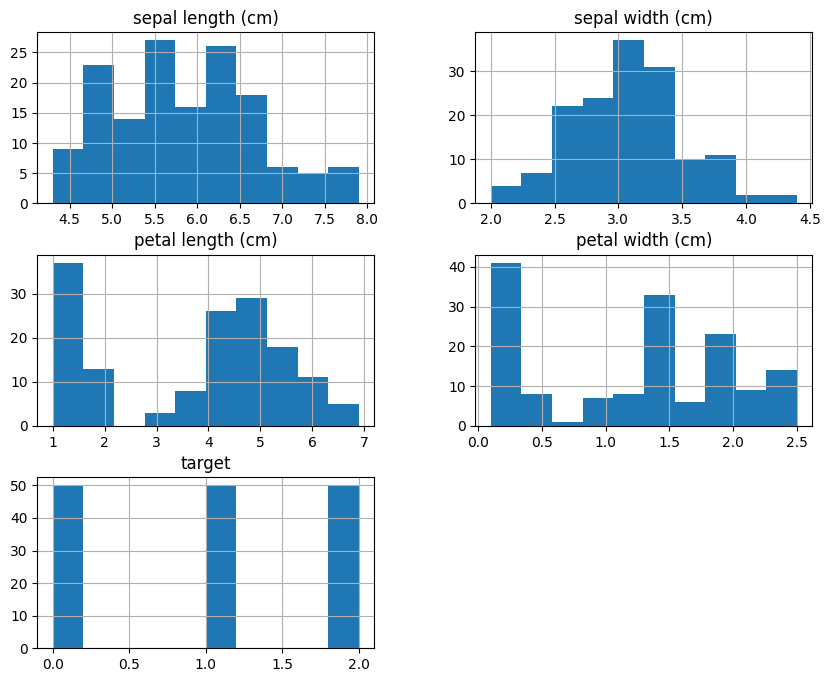

In [47]:
# Step 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize the distribution of features (Histograms)
df.hist(figsize=(10, 8))
plt.show()


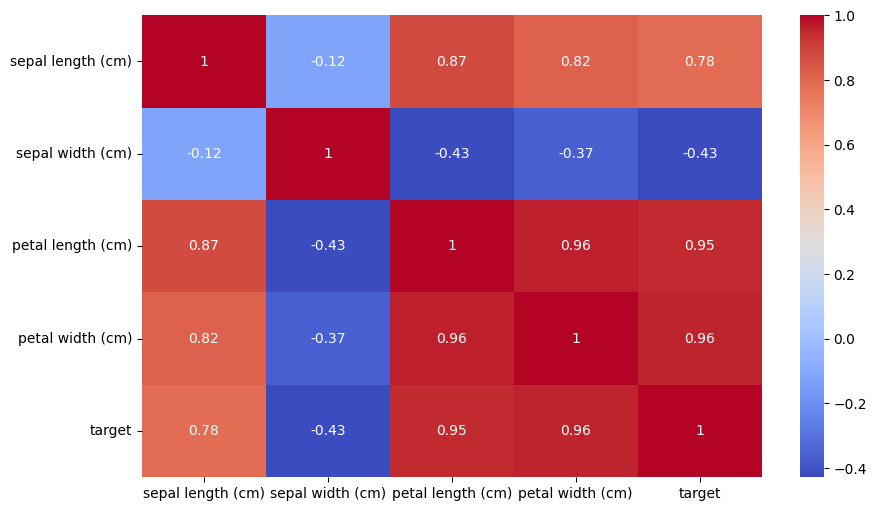

In [48]:
# Correlation matrix
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [49]:
# Step 3: Feature Engineering
# In this case, we don't have missing or categorical data, but in real use, you might need to encode or impute.



In [50]:
# Step 4: Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [51]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


Best Model Accuracy: 1.0
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



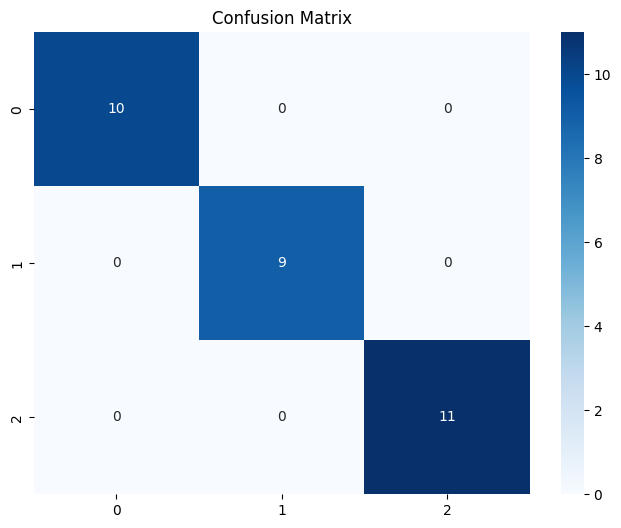

In [54]:

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Step 6: Model Evaluation and Analysis
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


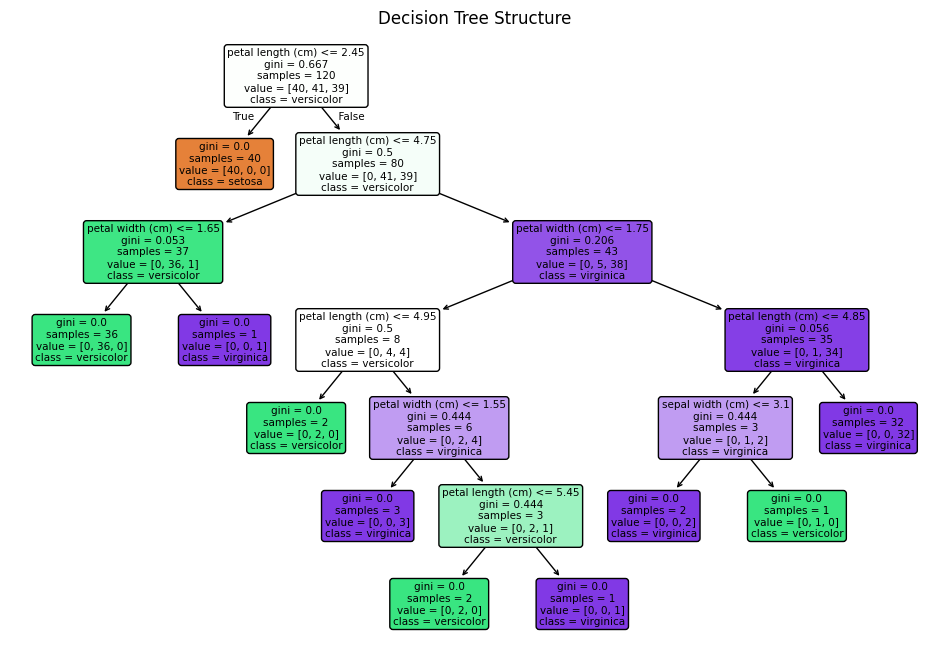

In [55]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=data.target_names, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

**1. Common hyperparameters in Decision Trees and what they do:**

max_depth: Limits how deep the tree can go. Prevents overfitting.

min_samples_split: Minimum samples needed to split a node. Higher = simpler tree.

min_samples_leaf: Minimum samples in a leaf. Helps avoid tiny leaves.

max_features: Limits the number of features used to split. Adds randomness.

criterion: Decides how to split (like 'gini' or 'entropy').

👉 These settings control how complex the tree is. Too complex = overfitting. Too simple = underfitting.




**2. Label Encoding vs One-Hot Encoding**:
Label Encoding: Turns categories into numbers (e.g., Red = 0, Green = 1).


👉 Good for ordered data.

One-Hot Encoding: Turns categories into separate columns with 0s and 1s.

👉 Good for unordered data.